In [ ]:
"""
BREAST CANCER SURVIVAL PREDICTION
Mission: Transform breast cancer care in Africa with AI and community support

Dataset: Breast Cancer Survival Dataset
Source: https://www.kaggle.com/datasets/kreeshrajani/breast-cancer-survival-dataset

Features:
- Age, Gender, Protein1-4, Tumour_Stage, Histology
- ER status, PR status, HER2 status, Surgery_type
- Date_of_Surgery, Date_of_Last_Visit, Patient_Status

Target Variable: Survival_Months (calculated from dates)

This script performs:
1. Data loading and exploration
2. Visualization and interpretation
3. Feature engineering (including survival time calculation)
4. Data preprocessing (numeric conversion, standardization)
5. Model training (Linear Regression, Decision Tree, Random Forest)
6. Model optimization with gradient descent
7. Model evaluation and comparison
8. Saving the best model
"""

In [15]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("BREAST CANCER SURVIVAL PREDICTION - ML FORMATIVE ASSESSMENT")
print("Mission: Transform breast cancer care in Africa with AI and community support")
print("="*80)

# ============================================================================
# STEP 1: LOAD THE DATASET
# ============================================================================
print("\n[STEP 1] Loading Dataset...")

# Load the Breast Cancer Survival Dataset
# Download from: https://www.kaggle.com/datasets/kreeshrajani/breast-cancer-survival-dataset

try:
    df = pd.read_csv('breast_cancer_survival.csv')
    print(f"✓ Dataset loaded successfully!")
except FileNotFoundError:
    try:
        df = pd.read_csv('breast_cancer_survival.csv')
        print(f"✓ Dataset loaded successfully!")
    except FileNotFoundError:
        print("\n⚠ Dataset file not found!")
        print("Please download from: https://www.kaggle.com/datasets/kreeshrajani/breast-cancer-survival-dataset")
        print("Save as 'BRCA.csv' in the same folder as this script")
        exit()

print(f"  Shape: {df.shape}")
print(f"  Total features: {df.shape[1]}")
print(f"  Total samples: {df.shape[0]}")

# Display first few rows
print("\n--- First 5 Rows ---")
print(df.head())

# Display column names
print("\n--- Column Names ---")
print(df.columns.tolist())


BREAST CANCER SURVIVAL PREDICTION - ML FORMATIVE ASSESSMENT
Mission: Transform breast cancer care in Africa with AI and community support

[STEP 1] Loading Dataset...
✓ Dataset loaded successfully!
  Shape: (334, 15)
  Total features: 15
  Total samples: 334

--- First 5 Rows ---
   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Posit

In [3]:

# ============================================================================
# STEP 2: FEATURE ENGINEERING - CREATE TARGET VARIABLE
# ============================================================================
print("\n[STEP 2] Feature Engineering - Creating Target Variable...")

# Convert date columns to datetime
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y', errors='coerce')
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y', errors='coerce')

# Calculate Survival Months
df['Survival_Days'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days
df['Survival_Months'] = df['Survival_Days'] / 30.44

# Handle any negative or invalid values
df = df[df['Survival_Months'] > 0]
df = df.dropna(subset=['Survival_Months'])

print(f"\n✓ Created target variable: Survival_Months")
print(f"  - Calculated from Date_of_Surgery to Date_of_Last_Visit")
print(f"  - This is a REGRESSION problem (predicting continuous survival time)")
print(f"  - Samples after cleaning: {len(df)}")

# Display survival statistics
print(f"\n--- Survival Time Statistics ---")
print(f"  Mean:   {df['Survival_Months'].mean():.2f} months")
print(f"  Median: {df['Survival_Months'].median():.2f} months")
print(f"  Min:    {df['Survival_Months'].min():.2f} months")
print(f"  Max:    {df['Survival_Months'].max():.2f} months")
print(f"  Std:    {df['Survival_Months'].std():.2f} months")


[STEP 2] Feature Engineering - Creating Target Variable...

✓ Created target variable: Survival_Months
  - Calculated from Date_of_Surgery to Date_of_Last_Visit
  - This is a REGRESSION problem (predicting continuous survival time)
  - Samples after cleaning: 316

--- Survival Time Statistics ---
  Mean:   14.76 months
  Median: 12.25 months
  Min:    0.13 months
  Max:    99.18 months
  Std:    12.68 months



[STEP 3] Exploratory Data Analysis & Visualizations...

--- Dataset Info ---
Age                            int64
Gender                        object
Protein1                     float64
Protein2                     float64
Protein3                     float64
Protein4                     float64
Tumour_Stage                  object
Histology                     object
ER status                     object
PR status                     object
HER2 status                   object
Surgery_type                  object
Date_of_Surgery       datetime64[ns]
Date_of_Last_Visit    datetime64[ns]
Patient_Status                object
Survival_Days                float64
Survival_Months              float64
dtype: object

--- Statistical Summary ---
              Age    Protein1    Protein2    Protein3    Protein4  \
count  316.000000  316.000000  316.000000  316.000000  316.000000   
mean    58.727848   -0.025586    0.951591   -0.093532    0.007918   
min     29.000000   -2.144600   -0.978730  

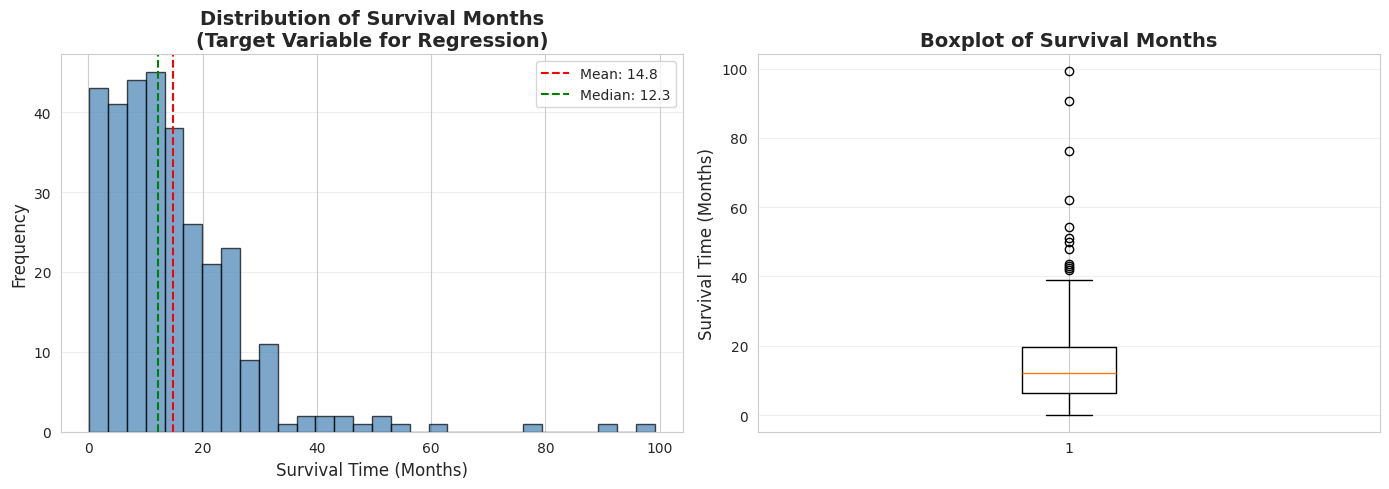


📊 INTERPRETATION - Target Variable:
   - Mean survival: 14.76 months
   - Median survival: 12.25 months
   - Distribution shows patient follow-up times vary significantly
   - This is suitable for REGRESSION analysis (continuous target)


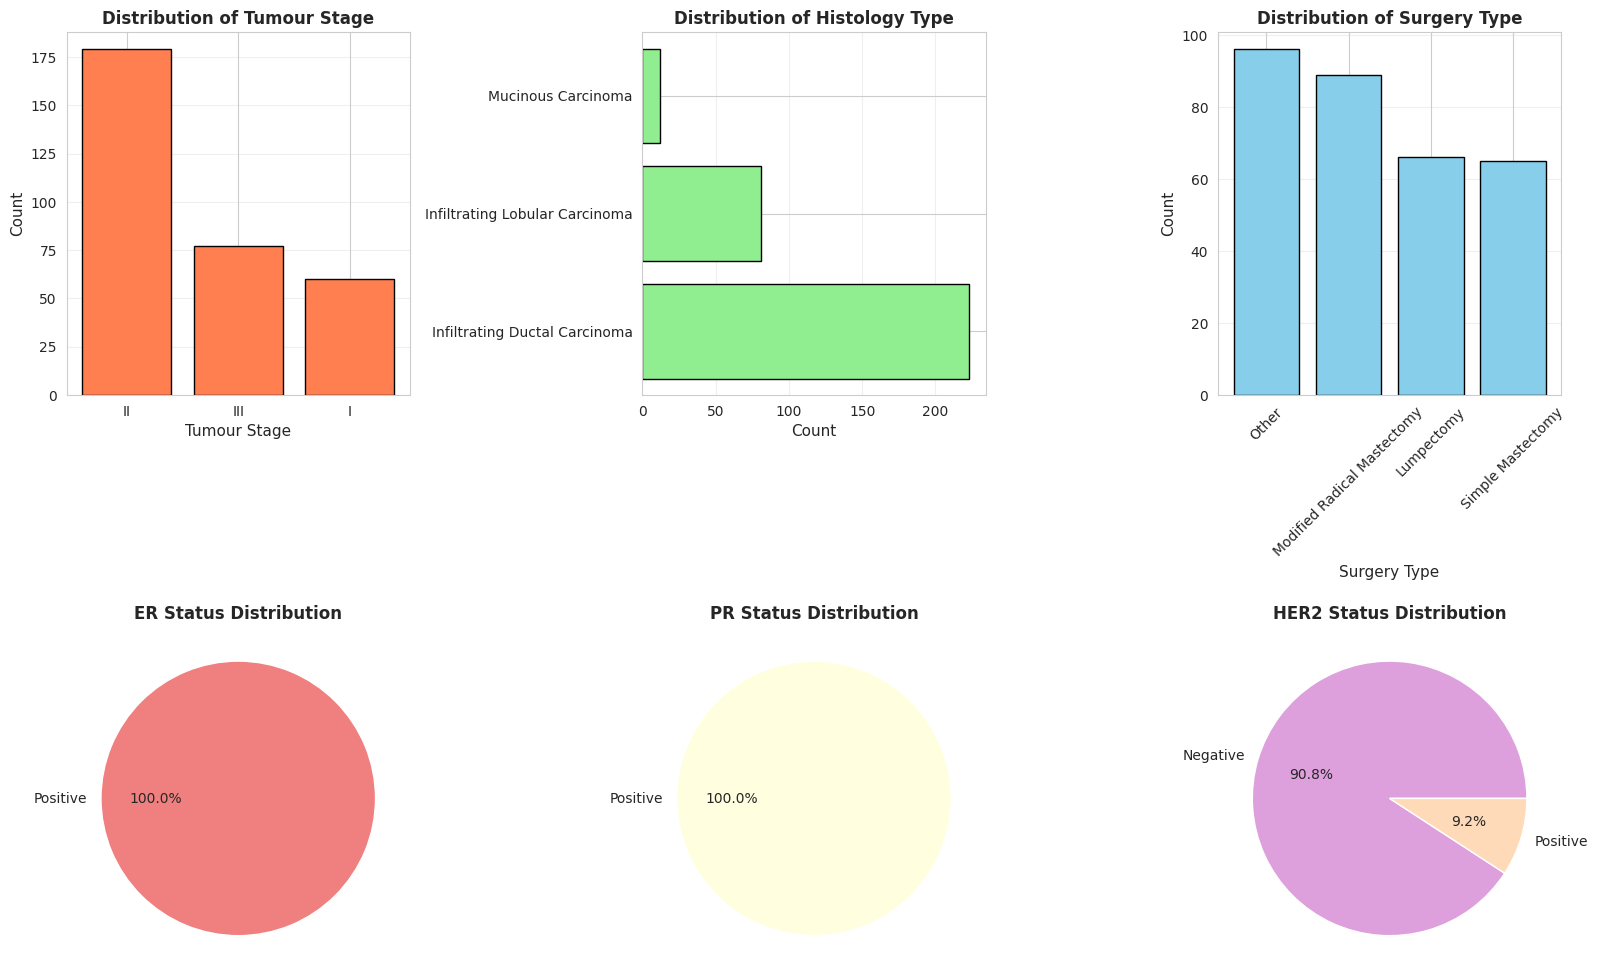


📊 INTERPRETATION - Categorical Features:
   - Most common tumour stage: II (179 patients)
   - Most common histology: Infiltrating Ductal Carcinoma...
   - ER Positive patients: 316 (100.0%)
   - These features represent key clinical characteristics


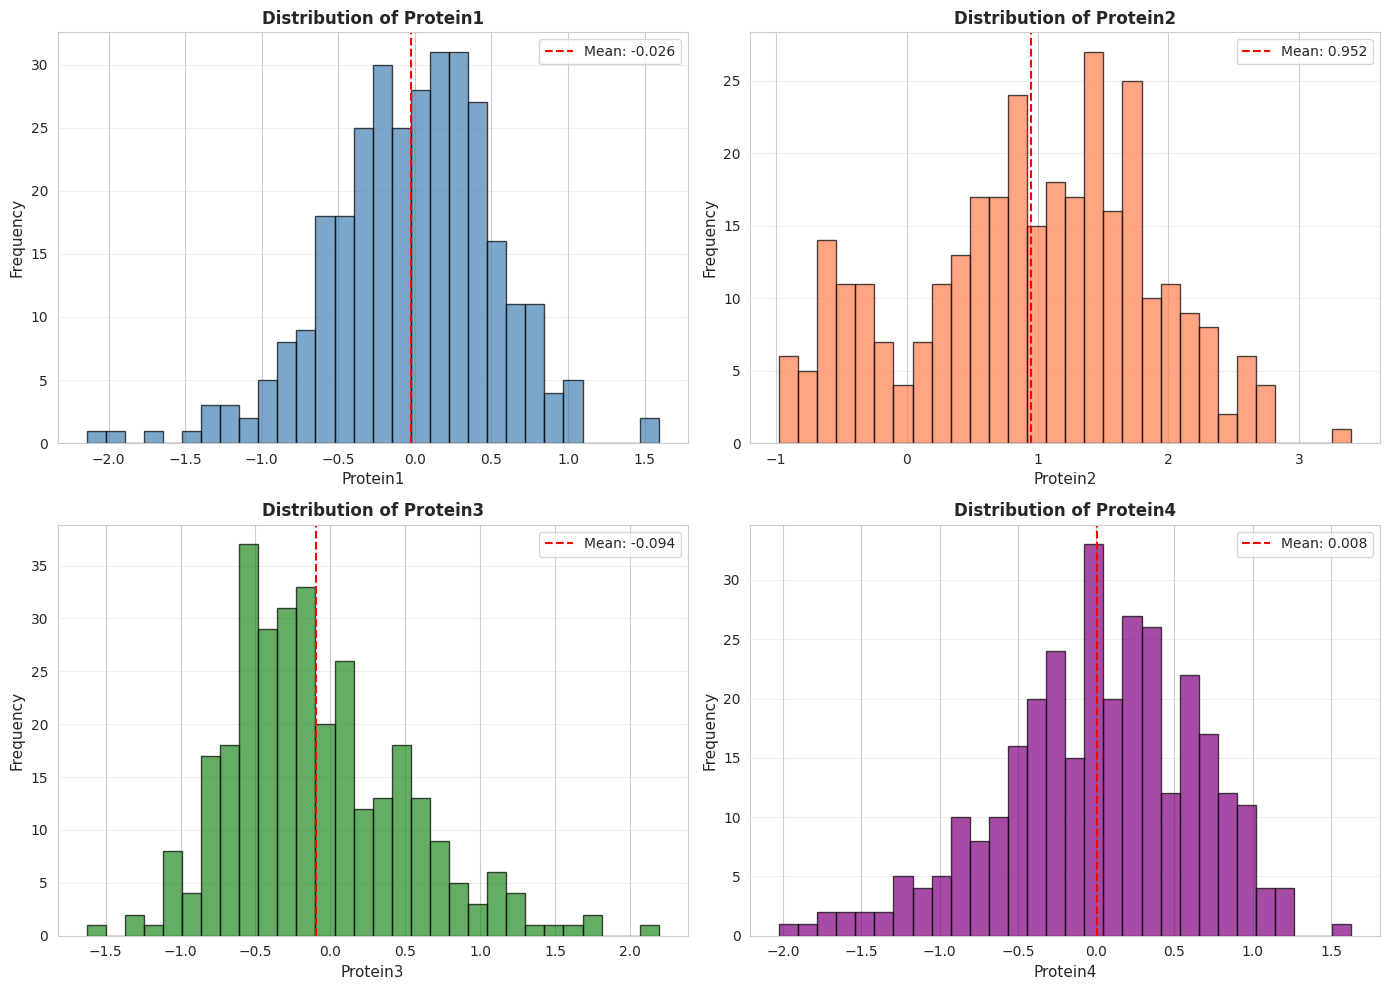


📊 INTERPRETATION - Protein Biomarkers:
   - Protein1: Mean=-0.026, Std=0.544
   - Protein2: Mean=0.952, Std=0.907
   - Protein3: Mean=-0.094, Std=0.589
   - Protein4: Mean=0.008, Std=0.627
   - These protein levels are potential biomarkers for survival prediction


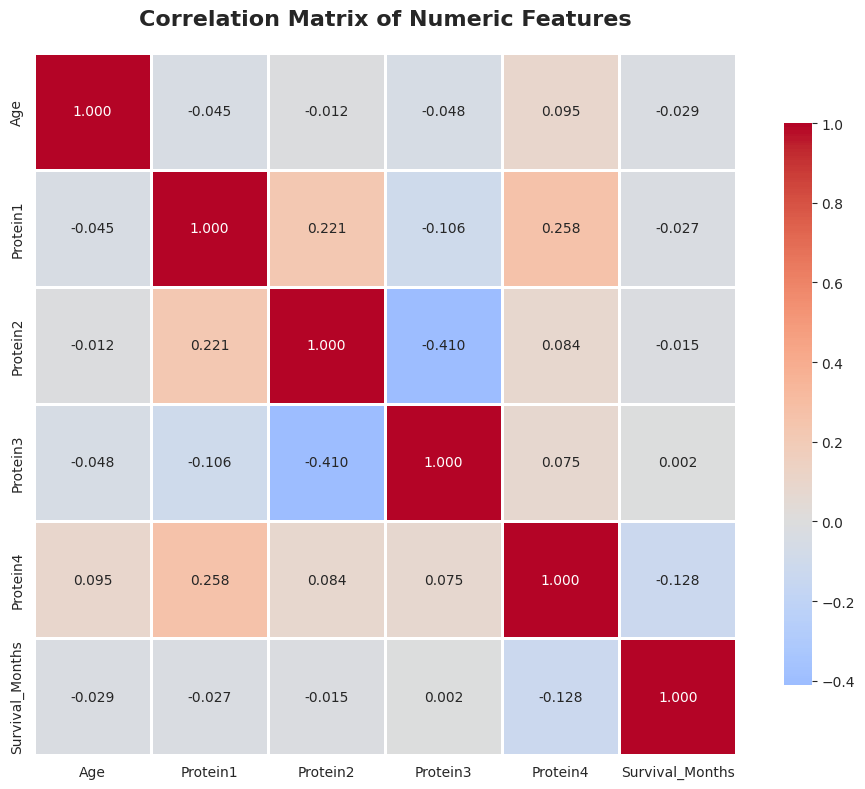


📊 INTERPRETATION - Feature Correlations:

Correlations with Survival_Months:
   Protein3: 0.002 (Weak)
   Protein2: -0.015 (Weak)
   Protein1: -0.027 (Weak)
   Age: -0.029 (Weak)
   Protein4: -0.128 (Moderate)


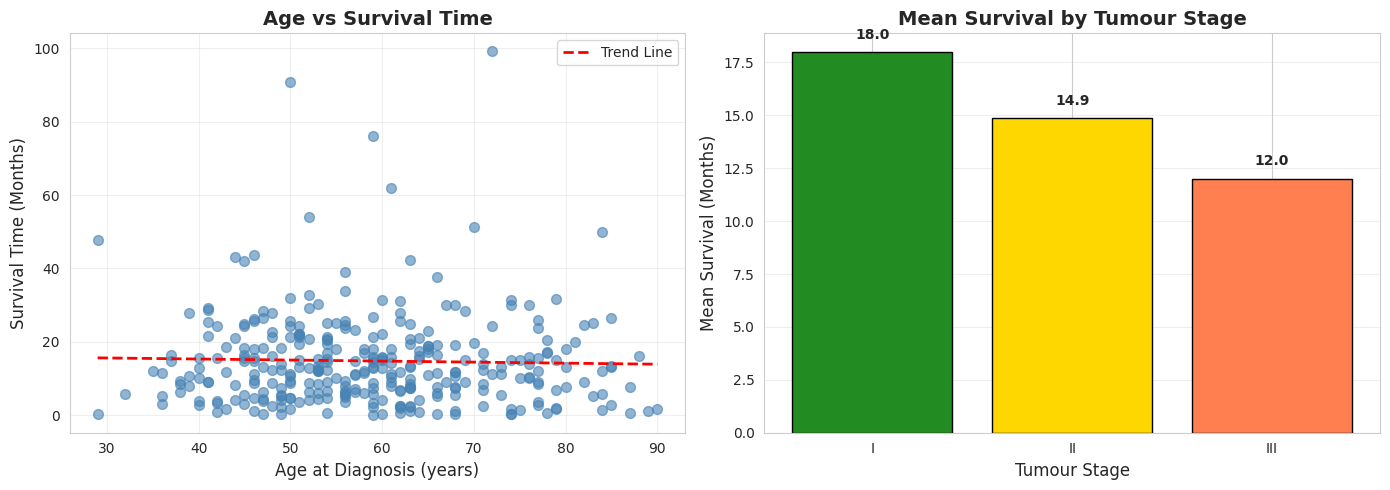


📊 INTERPRETATION - Age and Stage Analysis:
   - Age range: 29 - 90 years
   - Mean age: 58.7 years
   - Survival by stage shows clinical relevance
   - Higher stages may indicate worse prognosis

[STEP 4] Feature Engineering - Selecting Features...

 Features DROPPED (with reasons):
   - Date_of_Surgery: Used to create target variable, not a predictor
   - Date_of_Last_Visit: Used to create target variable, not a predictor
   - Survival_Days: Redundant with Survival_Months (our target)
   - Patient_Status: Data leakage - this is outcome information
   - Gender: Low variance - 98.7% same value

✓ Features KEPT for modeling (11 features):
   1. Age (Numeric)
   2. Protein1 (Numeric)
   3. Protein2 (Numeric)
   4. Protein3 (Numeric)
   5. Protein4 (Numeric)
   6. Tumour_Stage (Categorical - needs encoding)
   7. Histology (Categorical - needs encoding)
   8. ER status (Categorical - needs encoding)
   9. PR status (Categorical - needs encoding)
   10. HER2 status (Categorical - needs enc

In [4]:

# ============================================================================
# STEP 3: EXPLORATORY DATA ANALYSIS & VISUALIZATION
# ============================================================================
print("\n[STEP 3] Exploratory Data Analysis & Visualizations...")

# Display basic information
print("\n--- Dataset Info ---")
print(df.dtypes)

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Missing Values ---")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("No missing values found!")

# VISUALIZATION 1: Distribution of Target Variable (Survival Months)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Survival_Months'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Survival Time (Months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Survival Months\n(Target Variable for Regression)', fontsize=14, fontweight='bold')
plt.axvline(df['Survival_Months'].mean(), color='red', linestyle='--', label=f'Mean: {df["Survival_Months"].mean():.1f}')
plt.axvline(df['Survival_Months'].median(), color='green', linestyle='--', label=f'Median: {df["Survival_Months"].median():.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Survival_Months'], vert=True)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.title('Boxplot of Survival Months', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('01_survival_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Target Variable:")
print(f"   - Mean survival: {df['Survival_Months'].mean():.2f} months")
print(f"   - Median survival: {df['Survival_Months'].median():.2f} months")
print(f"   - Distribution shows patient follow-up times vary significantly")
print(f"   - This is suitable for REGRESSION analysis (continuous target)")

# VISUALIZATION 2: Categorical Features Distribution
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Tumour Stage
stage_counts = df['Tumour_Stage'].value_counts()
axes[0, 0].bar(stage_counts.index, stage_counts.values, color='coral', edgecolor='black')
axes[0, 0].set_xlabel('Tumour Stage', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_title('Distribution of Tumour Stage', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Histology
hist_counts = df['Histology'].value_counts()
axes[0, 1].barh(hist_counts.index, hist_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_xlabel('Count', fontsize=11)
axes[0, 1].set_title('Distribution of Histology Type', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Surgery Type
surgery_counts = df['Surgery_type'].value_counts()
axes[0, 2].bar(surgery_counts.index, surgery_counts.values, color='skyblue', edgecolor='black')
axes[0, 2].set_xlabel('Surgery Type', fontsize=11)
axes[0, 2].set_ylabel('Count', fontsize=11)
axes[0, 2].set_title('Distribution of Surgery Type', fontsize=12, fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# ER Status
er_counts = df['ER status'].value_counts()
axes[1, 0].pie(er_counts.values, labels=er_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[1, 0].set_title('ER Status Distribution', fontsize=12, fontweight='bold')

# PR Status
pr_counts = df['PR status'].value_counts()
axes[1, 1].pie(pr_counts.values, labels=pr_counts.index, autopct='%1.1f%%', colors=['lightyellow', 'lightgreen'])
axes[1, 1].set_title('PR Status Distribution', fontsize=12, fontweight='bold')

# HER2 Status
her2_counts = df['HER2 status'].value_counts()
axes[1, 2].pie(her2_counts.values, labels=her2_counts.index, autopct='%1.1f%%', colors=['plum', 'peachpuff'])
axes[1, 2].set_title('HER2 Status Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('02_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Categorical Features:")
print(f"   - Most common tumour stage: {stage_counts.index[0]} ({stage_counts.values[0]} patients)")
print(f"   - Most common histology: {hist_counts.index[0][:30]}...")
print(f"   - ER Positive patients: {(df['ER status']=='Positive').sum()} ({(df['ER status']=='Positive').mean()*100:.1f}%)")
print(f"   - These features represent key clinical characteristics")

# VISUALIZATION 3: Protein Levels Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
colors = ['steelblue', 'coral', 'forestgreen', 'purple']

for idx, (protein, color) in enumerate(zip(proteins, colors)):
    row, col = idx // 2, idx % 2
    axes[row, col].hist(df[protein].dropna(), bins=30, edgecolor='black', alpha=0.7, color=color)
    axes[row, col].axvline(df[protein].mean(), color='red', linestyle='--',
                           label=f'Mean: {df[protein].mean():.3f}')
    axes[row, col].set_xlabel(protein, fontsize=11)
    axes[row, col].set_ylabel('Frequency', fontsize=11)
    axes[row, col].set_title(f'Distribution of {protein}', fontsize=12, fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('03_protein_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Protein Biomarkers:")
print(f"   - Protein1: Mean={df['Protein1'].mean():.3f}, Std={df['Protein1'].std():.3f}")
print(f"   - Protein2: Mean={df['Protein2'].mean():.3f}, Std={df['Protein2'].std():.3f}")
print(f"   - Protein3: Mean={df['Protein3'].mean():.3f}, Std={df['Protein3'].std():.3f}")
print(f"   - Protein4: Mean={df['Protein4'].mean():.3f}, Std={df['Protein4'].std():.3f}")
print(f"   - These protein levels are potential biomarkers for survival prediction")

# VISUALIZATION 4: Correlation Matrix
# Prepare numeric data for correlation
df_numeric = df[['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Survival_Months']].copy()

plt.figure(figsize=(10, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Feature Correlations:")
survival_corr = correlation_matrix['Survival_Months'].sort_values(ascending=False)
print("\nCorrelations with Survival_Months:")
for feature, corr_value in survival_corr.items():
    if feature != 'Survival_Months':
        strength = "Strong" if abs(corr_value) > 0.3 else "Moderate" if abs(corr_value) > 0.1 else "Weak"
        print(f"   {feature}: {corr_value:.3f} ({strength})")

# VISUALIZATION 5: Age vs Survival with Tumor Stage
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Survival_Months'], alpha=0.6, s=50, c='steelblue')
z = np.polyfit(df['Age'], df['Survival_Months'], 1)
p = np.poly1d(z)
plt.plot(df['Age'].sort_values(), p(df['Age'].sort_values()), "r--", linewidth=2, label='Trend Line')
plt.xlabel('Age at Diagnosis (years)', fontsize=12)
plt.ylabel('Survival Time (Months)', fontsize=12)
plt.title('Age vs Survival Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
stage_survival = df.groupby('Tumour_Stage')['Survival_Months'].mean().sort_index()
colors = ['forestgreen', 'gold', 'coral']
bars = plt.bar(stage_survival.index, stage_survival.values, color=colors, edgecolor='black')
plt.xlabel('Tumour Stage', fontsize=12)
plt.ylabel('Mean Survival (Months)', fontsize=12)
plt.title('Mean Survival by Tumour Stage', fontsize=14, fontweight='bold')
for bar, val in zip(bars, stage_survival.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{val:.1f}',
             ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('05_age_stage_survival.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Age and Stage Analysis:")
print(f"   - Age range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")
print(f"   - Mean age: {df['Age'].mean():.1f} years")
print(f"   - Survival by stage shows clinical relevance")
print(f"   - Higher stages may indicate worse prognosis")

# ============================================================================
# STEP 4: FEATURE ENGINEERING - SELECT AND PREPARE FEATURES
# ============================================================================
print("\n[STEP 4] Feature Engineering - Selecting Features...")

# Columns to drop (not useful for prediction)
columns_to_drop = [
    'Date_of_Surgery',      # Used to calculate target, not a predictor
    'Date_of_Last_Visit',   # Used to calculate target, not a predictor
    'Survival_Days',        # Redundant with target
    'Patient_Status',       # This would be data leakage (outcome info)
    'Gender'                # Almost all female, no predictive value
]

# Keep relevant features
feature_cols = [col for col in df.columns
                if col not in columns_to_drop and col != 'Survival_Months']

print(f"\n Features DROPPED (with reasons):")
for col in columns_to_drop:
    if col in df.columns:
        print(f"   - {col}: ", end="")
        if col in ['Date_of_Surgery', 'Date_of_Last_Visit']:
            print("Used to create target variable, not a predictor")
        elif col == 'Survival_Days':
            print("Redundant with Survival_Months (our target)")
        elif col == 'Patient_Status':
            print("Data leakage - this is outcome information")
        elif col == 'Gender':
            print(f"Low variance - {df['Gender'].value_counts().iloc[0]/len(df)*100:.1f}% same value")

print(f"\n✓ Features KEPT for modeling ({len(feature_cols)} features):")
for i, col in enumerate(feature_cols, 1):
    dtype = df[col].dtype
    if dtype == 'object':
        print(f"   {i}. {col} (Categorical - needs encoding)")
    else:
        print(f"   {i}. {col} (Numeric)")

# Prepare feature matrix and target
X = df[feature_cols].copy()
y = df['Survival_Months'].copy()

print(f"\n✓ Feature matrix (X): {X.shape}")
print(f"✓ Target vector (y): {y.shape}")

In [5]:
# ============================================================================
# STEP 5: CONVERT CATEGORICAL TO NUMERIC
# ============================================================================
print("\n[STEP 5] Converting Categorical Features to Numeric...")

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns requiring encoding: {len(categorical_cols)}")

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].fillna('Unknown')
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

    print(f"\n   {col}:")
    print(f"      Classes: {list(le.classes_)}")
    print(f"      Encoded: 0 to {len(le.classes_)-1}")

# Save encoders for prediction script
joblib.dump(label_encoders, 'label_encoders.pkl')
print("\n✓ Label encoders saved to 'label_encoders.pkl'")

# Verify all features are now numeric
print(f"\n✓ All features converted to numeric")
print(f"  Data types after encoding:")
print(X.dtypes)



[STEP 5] Converting Categorical Features to Numeric...

Categorical columns requiring encoding: 6

   Tumour_Stage:
      Classes: ['I', 'II', 'III']
      Encoded: 0 to 2

   Histology:
      Classes: ['Infiltrating Ductal Carcinoma', 'Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma']
      Encoded: 0 to 2

   ER status:
      Classes: ['Positive']
      Encoded: 0 to 0

   PR status:
      Classes: ['Positive']
      Encoded: 0 to 0

   HER2 status:
      Classes: ['Negative', 'Positive']
      Encoded: 0 to 1

   Surgery_type:
      Classes: ['Lumpectomy', 'Modified Radical Mastectomy', 'Other', 'Simple Mastectomy']
      Encoded: 0 to 3

✓ Label encoders saved to 'label_encoders.pkl'

✓ All features converted to numeric
  Data types after encoding:
Age               int64
Protein1        float64
Protein2        float64
Protein3        float64
Protein4        float64
Tumour_Stage      int64
Histology         int64
ER status         int64
PR status         int64
HER2 status    

In [6]:

# ============================================================================
# STEP 6: STANDARDIZE THE DATA
# ============================================================================
print("\n[STEP 6] Standardizing Features...")

# Split data BEFORE standardization (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✓ Data split (80% train, 20% test):")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print(f"\n✓ Features standardized (z-score normalization)")
print(f"  Formula: z = (x - mean) / std")
print(f"  Result: mean ≈ 0, std ≈ 1 for all features")
print(f"  Scaler saved to 'scaler.pkl'")

# Show before/after standardization
print(f"\n  Before standardization (sample means): {X_train.mean().values[:3].round(3)}")
print(f"  After standardization (sample means):  {X_train_scaled.mean(axis=0)[:3].round(6)}")



[STEP 6] Standardizing Features...

✓ Data split (80% train, 20% test):
  Training samples: 252
  Testing samples: 64

✓ Features standardized (z-score normalization)
  Formula: z = (x - mean) / std
  Result: mean ≈ 0, std ≈ 1 for all features
  Scaler saved to 'scaler.pkl'

  Before standardization (sample means): [ 5.8667e+01 -2.5000e-02  9.4800e-01]
  After standardization (sample means):  [0. 0. 0.]


In [7]:

# ============================================================================
# STEP 7: MODEL TRAINING - LINEAR REGRESSION
# ============================================================================
print("\n" + "="*80)
print("[STEP 7] MODEL TRAINING")
print("="*80)

print("\n" + "-"*60)
print("MODEL 1: LINEAR REGRESSION (Standard)")
print("-"*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_train_lr = lr_model.predict(X_train_scaled)
y_pred_test_lr = lr_model.predict(X_test_scaled)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)

print(f"\nLinear Regression Performance:")
print(f"  Training RMSE: {rmse_train_lr:.3f} months")
print(f"  Testing RMSE:  {rmse_test_lr:.3f} months")
print(f"  Training R²:   {r2_train_lr:.4f}")
print(f"  Testing R²:    {r2_test_lr:.4f}")
print(f"  Testing MAE:   {mae_test_lr:.3f} months")

# Feature coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nFeature Coefficients (weights):")
for _, row in coef_df.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"  {row['Feature']}: {row['Coefficient']:.4f} ({impact} survival)")



[STEP 7] MODEL TRAINING

------------------------------------------------------------
MODEL 1: LINEAR REGRESSION (Standard)
------------------------------------------------------------

Linear Regression Performance:
  Training RMSE: 12.941 months
  Testing RMSE:  9.362 months
  Training R²:   0.0643
  Testing R²:    -0.0108
  Testing MAE:   7.009 months

Feature Coefficients (weights):
  Tumour_Stage: -2.1950 (decreases survival)
  Surgery_type: 1.6344 (increases survival)
  Protein4: -1.5044 (decreases survival)
  Age: -1.0739 (decreases survival)
  HER2 status: -0.7460 (decreases survival)
  Protein1: 0.3930 (increases survival)
  Protein2: -0.3081 (decreases survival)
  Histology: 0.2170 (increases survival)
  Protein3: -0.0228 (decreases survival)
  ER status: -0.0000 (decreases survival)
  PR status: 0.0000 (decreases survival)



------------------------------------------------------------
MODEL 2: LINEAR REGRESSION WITH GRADIENT DESCENT
------------------------------------------------------------

Training with Gradient Descent...
Epoch | Train Loss | Test Loss
-----------------------------------
   20  |    170.969  |     91.447
   40  |    170.969  |     91.447
   60  |    170.969  |     91.447
   80  |    170.969  |     91.447
  100  |    170.969  |     91.447

Gradient Descent Performance:
  Training RMSE: 13.076 months
  Testing RMSE:  9.563 months
  Training R²:   0.0447
  Testing R²:    -0.0546
  Testing MAE:   7.320 months


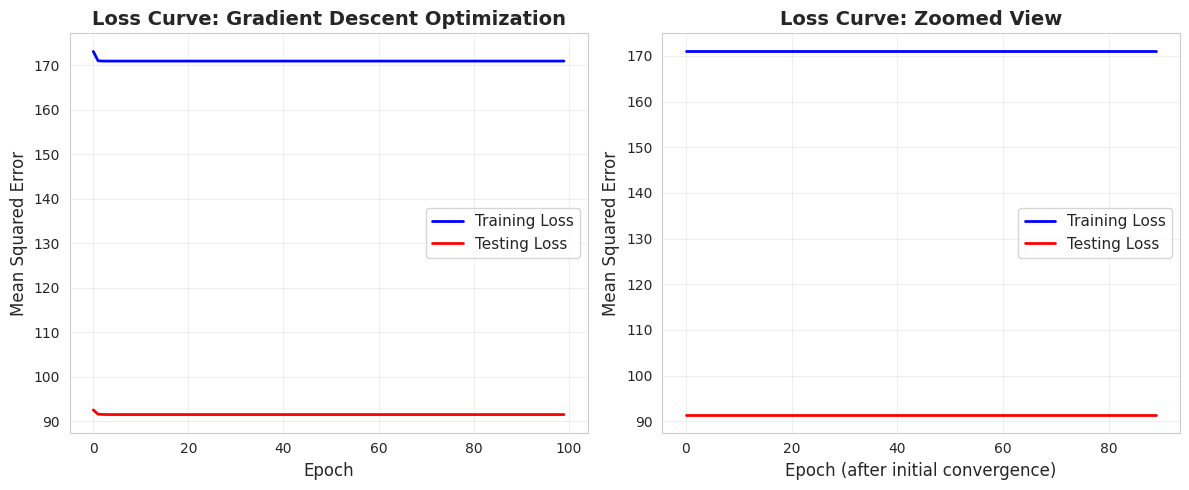


📊 INTERPRETATION - Loss Curve:
   - Initial loss: 173.13
   - Final loss: 170.97
   - Loss reduction: 1.2%
   - Convergence shows successful optimization
   - Train/test gap indicates generalization ability


In [8]:

# ============================================================================
# GRADIENT DESCENT OPTIMIZATION
# ============================================================================
print("\n" + "-"*60)
print("MODEL 2: LINEAR REGRESSION WITH GRADIENT DESCENT")
print("-"*60)

# SGDRegressor implements gradient descent
sgd_model = SGDRegressor(
    max_iter=1000,
    learning_rate='adaptive',
    eta0=0.01,
    tol=1e-4,
    random_state=42,
    verbose=0
)

losses_train = []
losses_test = []
n_epochs = 100

print("\nTraining with Gradient Descent...")
print("Epoch | Train Loss | Test Loss")
print("-" * 35)

for epoch in range(n_epochs):
    sgd_model.partial_fit(X_train_scaled, y_train)

    y_pred_train_sgd = sgd_model.predict(X_train_scaled)
    y_pred_test_sgd = sgd_model.predict(X_test_scaled)

    loss_train = mean_squared_error(y_train, y_pred_train_sgd)
    loss_test = mean_squared_error(y_test, y_pred_test_sgd)

    losses_train.append(loss_train)
    losses_test.append(loss_test)

    if (epoch + 1) % 20 == 0:
        print(f"  {epoch+1:3d}  |  {loss_train:9.3f}  |  {loss_test:9.3f}")

# Final metrics
y_pred_train_sgd = sgd_model.predict(X_train_scaled)
y_pred_test_sgd = sgd_model.predict(X_test_scaled)

rmse_train_sgd = np.sqrt(mean_squared_error(y_train, y_pred_train_sgd))
rmse_test_sgd = np.sqrt(mean_squared_error(y_test, y_pred_test_sgd))
r2_train_sgd = r2_score(y_train, y_pred_train_sgd)
r2_test_sgd = r2_score(y_test, y_pred_test_sgd)
mae_test_sgd = mean_absolute_error(y_test, y_pred_test_sgd)

print(f"\nGradient Descent Performance:")
print(f"  Training RMSE: {rmse_train_sgd:.3f} months")
print(f"  Testing RMSE:  {rmse_test_sgd:.3f} months")
print(f"  Training R²:   {r2_train_sgd:.4f}")
print(f"  Testing R²:    {r2_test_sgd:.4f}")
print(f"  Testing MAE:   {mae_test_sgd:.3f} months")

# PLOT LOSS CURVE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_train, label='Training Loss', linewidth=2, color='blue')
plt.plot(losses_test, label='Testing Loss', linewidth=2, color='red')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Loss Curve: Gradient Descent Optimization', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(losses_train[10:], label='Training Loss', linewidth=2, color='blue')
plt.plot(losses_test[10:], label='Testing Loss', linewidth=2, color='red')
plt.xlabel('Epoch (after initial convergence)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Loss Curve: Zoomed View', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('06_loss_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Loss Curve:")
print(f"   - Initial loss: {losses_train[0]:.2f}")
print(f"   - Final loss: {losses_train[-1]:.2f}")
print(f"   - Loss reduction: {((losses_train[0]-losses_train[-1])/losses_train[0]*100):.1f}%")
print(f"   - Convergence shows successful optimization")
print(f"   - Train/test gap indicates generalization ability")



Generating Before/After Scatter Plots...


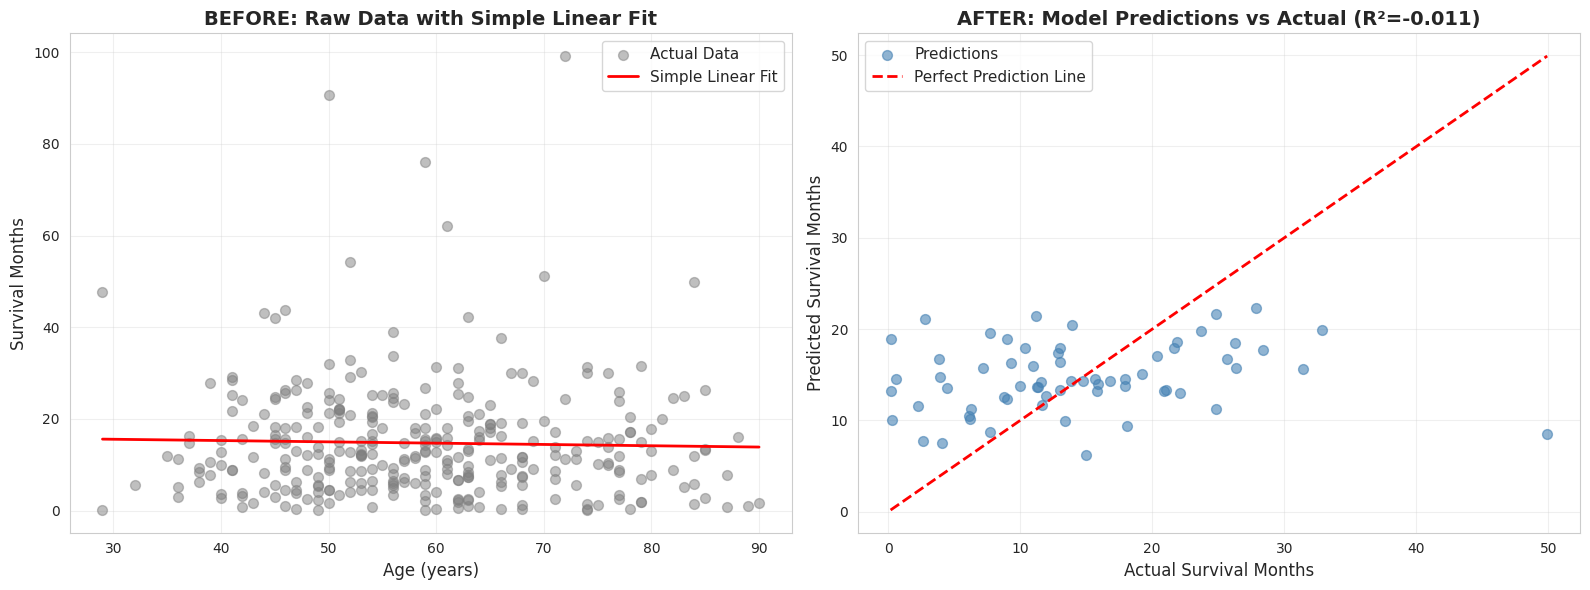


📊 INTERPRETATION - Before/After Comparison:
   - BEFORE: Single feature shows weak relationship
   - AFTER: Multi-feature model captures more variance
   - Points closer to diagonal = better predictions
   - Spread around line indicates prediction uncertainty


In [9]:

# ============================================================================
# BEFORE AND AFTER SCATTER PLOTS
# ============================================================================
print("\nGenerating Before/After Scatter Plots...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE: Raw data - Age vs Survival
axes[0].scatter(df['Age'], df['Survival_Months'], alpha=0.5, s=50, color='gray', label='Actual Data')
z = np.polyfit(df['Age'], df['Survival_Months'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['Age'].min(), df['Age'].max(), 100)
axes[0].plot(x_line, p(x_line), 'r-', linewidth=2, label='Simple Linear Fit')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Survival Months', fontsize=12)
axes[0].set_title('BEFORE: Raw Data with Simple Linear Fit', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# AFTER: Model predictions vs Actual
axes[1].scatter(y_test, y_pred_test_lr, alpha=0.6, s=50, color='steelblue', label='Predictions')
min_val = min(y_test.min(), y_pred_test_lr.min())
max_val = max(y_test.max(), y_pred_test_lr.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction Line')
axes[1].set_xlabel('Actual Survival Months', fontsize=12)
axes[1].set_ylabel('Predicted Survival Months', fontsize=12)
axes[1].set_title(f'AFTER: Model Predictions vs Actual (R²={r2_test_lr:.3f})', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('07_before_after_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 INTERPRETATION - Before/After Comparison:")
print("   - BEFORE: Single feature shows weak relationship")
print("   - AFTER: Multi-feature model captures more variance")
print("   - Points closer to diagonal = better predictions")
print("   - Spread around line indicates prediction uncertainty")

In [11]:
# ============================================================================
# MODEL 2: DECISION TREE REGRESSOR
# ============================================================================
print("\n" + "="*60)
print("MODEL 2: DECISION TREE REGRESSOR")
print("="*60)

dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10,
                                 min_samples_leaf=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_train_dt = dt_model.predict(X_train_scaled)
y_pred_test_dt = dt_model.predict(X_test_scaled)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)

print(f"\nDecision Tree Performance:")
print(f"  Training RMSE: {rmse_train_dt:.3f} months")
print(f"  Testing RMSE:  {rmse_test_dt:.3f} months")
print(f"  Training R²:   {r2_train_dt:.4f}")
print(f"  Testing R²:    {r2_test_dt:.4f}")
print(f"  Testing MAE:   {mae_test_dt:.3f} months")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\nTop 10 Important Features (Decision Tree):")
print(feature_importance_dt.to_string(index=False))


MODEL 2: DECISION TREE REGRESSOR

Decision Tree Performance:
  Training RMSE: 9.582 months
  Testing RMSE:  14.263 months
  Training R²:   0.4869
  Testing R²:    -1.3463
  Testing MAE:   10.275 months

Top 10 Important Features (Decision Tree):
     Feature  Importance
    Protein4    0.248844
         Age    0.198660
Surgery_type    0.162379
    Protein1    0.111577
    Protein3    0.108473
    Protein2    0.095911
Tumour_Stage    0.039371
   Histology    0.034785
   ER status    0.000000
   PR status    0.000000



MODEL 3: RANDOM FOREST REGRESSOR

Random Forest Performance:
  Training RMSE: 9.944 months
  Testing RMSE:  9.416 months
  Training R²:   0.4475
  Testing R²:    -0.0225
  Testing MAE:   6.996 months

Top 10 Important Features (Random Forest):
     Feature  Importance
    Protein4    0.188177
    Protein1    0.181333
    Protein2    0.167396
    Protein3    0.162777
         Age    0.143680
Surgery_type    0.082079
Tumour_Stage    0.054781
   Histology    0.019778
   ER status    0.000000
   PR status    0.000000


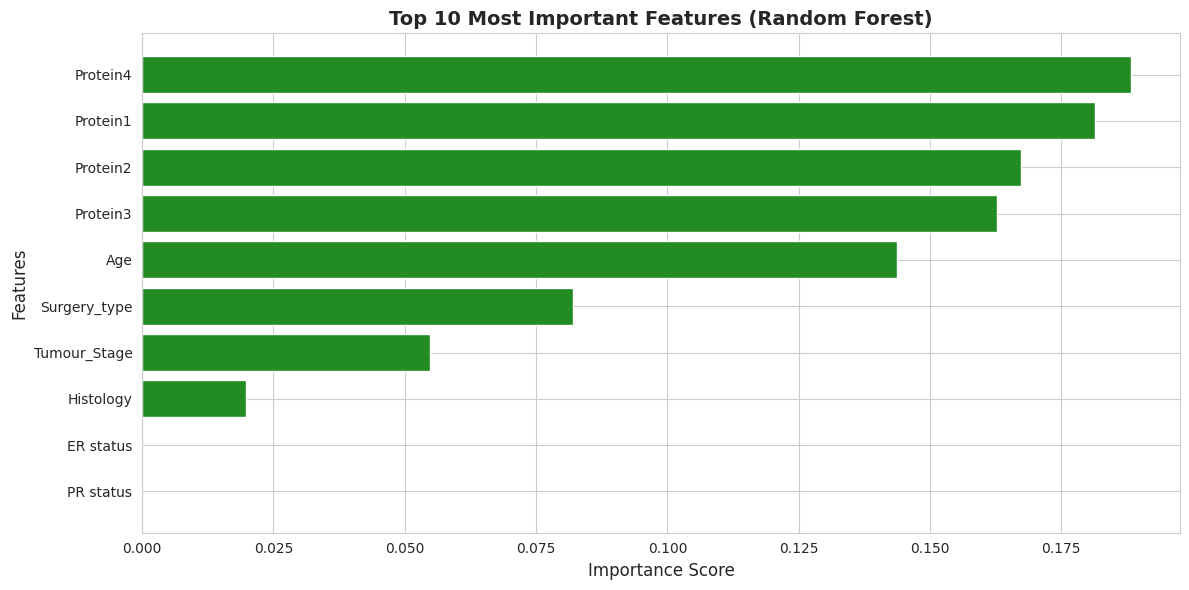

In [12]:

# ============================================================================
# MODEL 3: RANDOM FOREST REGRESSOR
# ============================================================================
print("\n" + "="*60)
print("MODEL 3: RANDOM FOREST REGRESSOR")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=15,
                                 min_samples_split=10, min_samples_leaf=5,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

print(f"\nRandom Forest Performance:")
print(f"  Training RMSE: {rmse_train_rf:.3f} months")
print(f"  Testing RMSE:  {rmse_test_rf:.3f} months")
print(f"  Training R²:   {r2_train_rf:.4f}")
print(f"  Testing R²:    {r2_test_rf:.4f}")
print(f"  Testing MAE:   {mae_test_rf:.3f} months")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\nTop 10 Important Features (Random Forest):")
print(feature_importance_rf.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_rf['Feature'],
         feature_importance_rf['Importance'], color='forestgreen')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Most Important Features (Random Forest)',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('06_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


MODEL COMPARISON SUMMARY

               Model  Train RMSE  Test RMSE  Train R²   Test R²  Test MAE
  Linear Regression   12.941039   9.361889  0.064261 -0.010791  7.009387
Gradient Descent LR   13.075528   9.562807  0.044711 -0.054642  7.319661
      Decision Tree    9.582463  14.263338  0.486937 -1.346263 10.274696
      Random Forest    9.944078   9.416081  0.447483 -0.022527  6.996353


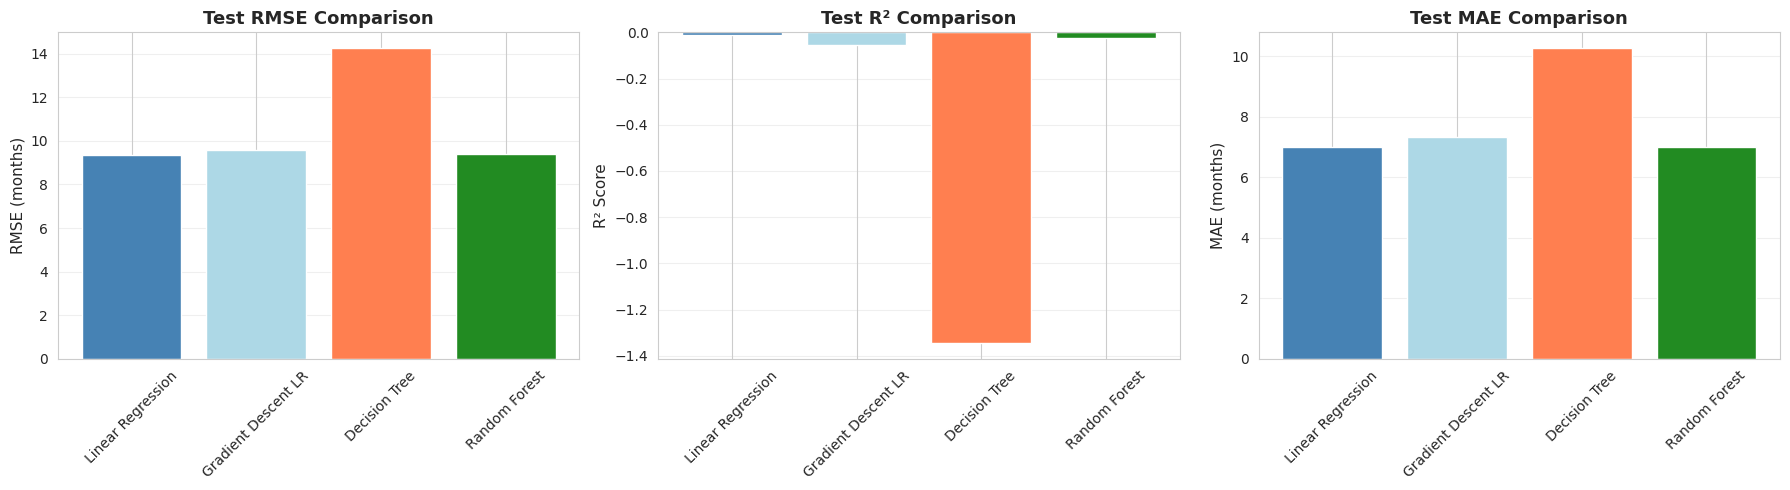

In [13]:
# ============================================================================
# MODEL COMPARISON
# ============================================================================
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Descent LR', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [rmse_train_lr, rmse_train_sgd, rmse_train_dt, rmse_train_rf],
    'Test RMSE': [rmse_test_lr, rmse_test_sgd, rmse_test_dt, rmse_test_rf],
    'Train R²': [r2_train_lr, r2_train_sgd, r2_train_dt, r2_train_rf],
    'Test R²': [r2_test_lr, r2_test_sgd, r2_test_dt, r2_test_rf],
    'Test MAE': [mae_test_lr, mae_test_sgd, mae_test_dt, mae_test_rf]
})

print("\n", comparison_df.to_string(index=False))

# Visualization of model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE Comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test RMSE'],
            color=['steelblue', 'lightblue', 'coral', 'forestgreen'])
axes[0].set_ylabel('RMSE (months)', fontsize=11)
axes[0].set_title('Test RMSE Comparison', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# R² Comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test R²'], color=[
            'steelblue', 'lightblue', 'coral', 'forestgreen'])
axes[1].set_ylabel('R² Score', fontsize=11)
axes[1].set_title('Test R² Comparison', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test MAE'],
            color=['steelblue', 'lightblue', 'coral', 'forestgreen'])
axes[2].set_ylabel('MAE (months)', fontsize=11)
axes[2].set_title('Test MAE Comparison', fontsize=13, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('07_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# ============================================================================
# SAVE THE BEST MODEL
# ============================================================================
print("\n" + "="*80)
print("SAVING BEST MODEL")
print("="*80)

# Determine best model based on Test R²
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_r2 = comparison_df.loc[best_model_idx, 'Test R²']
best_rmse = comparison_df.loc[best_model_idx, 'Test RMSE']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test R²: {best_r2:.4f}")
print(f"   Test RMSE: {best_rmse:.3f} months")

# Save the corresponding model
if best_model_name == 'Linear Regression':
    best_model = lr_model
elif best_model_name == 'Gradient Descent LR':
    best_model = sgd_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
else:
    best_model = rf_model

joblib.dump(best_model, 'best_breast_cancer_model.pkl')
print(f"\n✓ Best model saved as 'best_breast_cancer_model.pkl'")

# Save model metadata
metadata = {
    'model_name': best_model_name,
    'test_r2': float(best_r2),
    'test_rmse': float(best_rmse),
    'features': feature_cols,
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

with open('model_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=4)

print("✓ Model metadata saved as 'model_metadata.json'")


SAVING BEST MODEL

🏆 Best Model: Linear Regression
   Test R²: -0.0108
   Test RMSE: 9.362 months

✓ Best model saved as 'best_breast_cancer_model.pkl'
✓ Model metadata saved as 'model_metadata.json'
